# Wake Diffusion Tests

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook
pi2 = np.pi*2

In [22]:
# Set style of plots
colwidth=3.5
figwidth=6
figheight=4.5
ticksize= 8 *figwidth/colwidth 
labelsize=10 *figwidth/colwidth
titlesize = 10 *figwidth/colwidth
annotatesize= ticksize*1
# mpl.style.use('classic')
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize})
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':labelsize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-3,3]})
mpl.rcParams.update({'figure.figsize':[figwidth,figheight]})
mpl.rcParams.update({'image.cmap':'jet'})
mpl.rcParams.update({'axes.formatter.useoffset':True})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# To get sans-serif
# mpl.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})

# To use unicode
# params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
# params = {'text.usetex': True , 'mathtext.fontset': 'stixsans'}
# plt.rcParams.update(params)

# To be able to use SI units as micro (automatically upright)
# plt.rc('text', usetex = True)
# params = {'text.latex.preamble': [r'\usepackage{siunitx}', r'\usepackage{cmbright}']}
# plt.rcParams.update(params)


In [23]:

def rotation(a,b,C,S):
    temp = a
    a = C*a  + S*b
    b = -S*temp + C*b
    return a,b



<IPython.core.display.Javascript object>


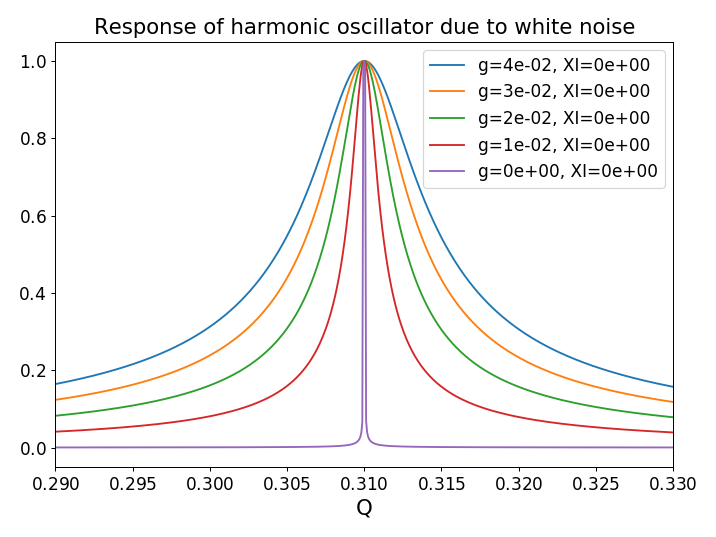

In [32]:
# Zero noise, vary g
plt.figure(num=3,figsize=(8,6)) ; 

<IPython.core.display.Javascript object>


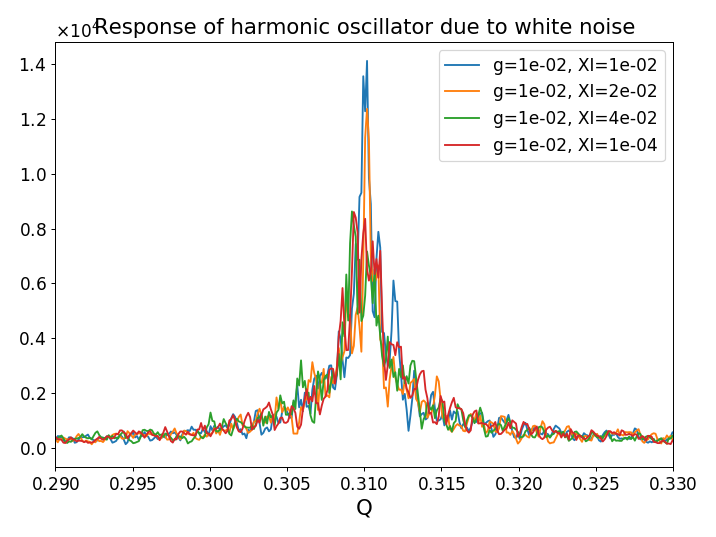

In [94]:
# Vary noise Const g, normalize to XI
# amplitude prop to XI.

plt.figure(2,figsize=(8,6)) ;

<IPython.core.display.Javascript object>


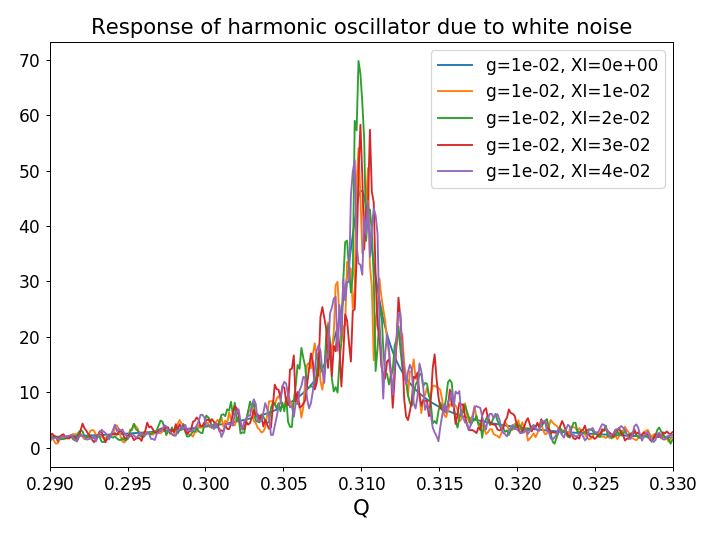

In [76]:
# Vary noise Const g, normalized to average
# -> It is the same shape  for all, simply lagrer amplitude for larger Q

plt.figure(1,figsize= (8,6)) ;

In [ ]:
Nt = 1024*8*1
Q = 0.31
C = np.cos(pi2*Q)
S = np.sin(pi2*Q)

g = 1e-2 * 1
XI= 1e-2 *.01

x0=1e-3
p0=0

x = np.zeros(Nt); x[0] = x0
p = np.zeros(Nt); p[0] = p0


for i in range(Nt-1):
    xi,pi = x[i],p[i] 

In [98]:

Nt = 1024*8*1
Q = 0.31
C = np.cos(pi2*Q)
S = np.sin(pi2*Q)

g = 1e-2 * 1
XI= 1e-2 *.01

x0=1e-3
p0=0

x = np.zeros(Nt); x[0] = x0
p = np.zeros(Nt); p[0] = p0


for i in range(Nt-1):
#     xi,pi = x[i],p[i] 
    xi,pi = rotation(xi,pi,C,S)
    pi -= g*pi
    pi += np.random.randn(1)*XI
    x[i+1],p[i+1] = xi,pi
    
    
# Plotting
A = np.fft.rfft(x)
A = np.abs(A)
A[1:-1]= (A[:-2]+A[1:-1]+A[2:])/3
f = np.fft.rfftfreq(Nt,1)
# if 0:
plt.figure(2)
plt.plot(f,A/[np.mean(A),XI,np.max(A)][1],label='g=%.0e, XI=%.0e'%(g,XI))
plt.xlim(Q-0.02,Q+0.02)
plt.title('Response of harmonic oscillator due to white noise')
plt.xlabel('Q')
plt.tight_layout()
plt.legend(loc=0);